<img src="https://upload.wikimedia.org/wikipedia/de/thumb/5/5b/Hochschule-aalen.svg/2000px-Hochschule-aalen.svg.png" alt="last access: 29.09.2021" width="400" height="30" style="float:right"/>

<img src="https://upload.wikimedia.org/wikipedia/de/thumb/4/41/Groupe_SEB_logo.svg/1200px-Groupe_SEB_logo.svg.png" alt="last access: 11.09.2022" width="30" height="30" style="float:left"/>

<hr style="height:2px;border:none;color:#003A6C;background-color:#003A6C;" />


Master Thesis Jessica Weiler, M.Sc. Data Science and Business Analytics 

# Image aesthetics assessment (IAA) of food and beverages using deep learning

## Testcase 1: Label Preprocessing

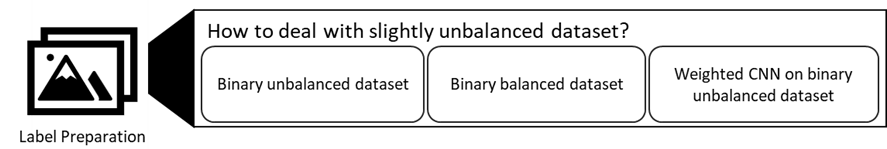

* D<sup>unbalanced</sup>: No techniques are conducted to change the RIAA dataset.
* D<sup>balanced</sup>: Undersampling is conducted to balance the RIAA dataset into equal classes.
* D<sup>weighted,unbalanced</sup>: Inspired by B. Jin, M. V. O. Segovia, and S. Susstrunk, “Image aesthetic predictors based on weighted CNNs,”, passing Kera’s weights for each class through a parameter cause the model to pay more attention to examples from an under-represented class.


### Load libraries

In [ ]:
# GPU Test
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import os
import PIL
import PIL.Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

import time
import datetime

import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import GridSearchCV, validation_curve, train_test_split, RandomizedSearchCV

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16, VGG19, Xception, ResNet50, inception_v3
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Flatten
# Image processing / Data Augmentation 
from tensorflow.keras.preprocessing.image import ImageDataGenerator





### Set Paths

In [ ]:
#Set paths

#Set workdir
wpth =os.path.abspath(os.getcwd()).replace("\\","/")

#Save data save path
save_data_dir = os.path.join(wpth, 'Saved_Data').replace("\\","/")
checkpoint_dir=  os.path.join(save_data_dir, 'Checkpoint').replace("\\","/")
df_model_histor_dir=  os.path.join(save_data_dir, 'df_model_history').replace("\\","/")

#Set folderpath RIAA 
RIAA_pth = os.path.join(wpth, 'Dataset','RIAA').replace("\\","/")

RIAA_train_pth = os.path.join(RIAA_pth, 'Data_Split', 'train').replace("\\","/")
RIAA_test_pth = os.path.join(RIAA_pth, 'Data_Split', 'test').replace("\\","/")
RIAA_val_pth = os.path.join(RIAA_pth, 'Data_Split', 'val').replace("\\","/")

RIAA_224_train_pth = os.path.join(RIAA_pth, 'Data_Split_224', 'train').replace("\\","/")
RIAA_224_test_pth = os.path.join(RIAA_pth, 'Data_Split_224', 'test').replace("\\","/")
RIAA_224_val_pth = os.path.join(RIAA_pth, 'Data_Split_224', 'val').replace("\\","/")

RIAA_224_balanced_train_pth = os.path.join(RIAA_pth, 'Data_Split_Balanced_224', 'train').replace("\\","/")
RIAA_224_balanced_test_pth = os.path.join(RIAA_pth, 'Data_Split_Balanced_224', 'test').replace("\\","/")
RIAA_224_balanced_val_pth = os.path.join(RIAA_pth, 'Data_Split_Balanced_224', 'val').replace("\\","/")

RIAA_224_binary_train_pth = os.path.join(RIAA_pth, 'Data_Split_Binary_224', 'train').replace("\\","/")
RIAA_224_binary_test_pth = os.path.join(RIAA_pth, 'Data_Split_Binary_224', 'test').replace("\\","/")
RIAA_224_binary_val_pth = os.path.join(RIAA_pth, 'Data_Split_Binary_224', 'val').replace("\\","/")

RIAA_224_binary_balanced_train_pth = os.path.join(RIAA_pth, 'Data_Split_Binary_Balanced_224', 'train').replace("\\","/")
RIAA_224_binary_balanced_test_pth = os.path.join(RIAA_pth, 'Data_Split_Binary_Balanced_224', 'test').replace("\\","/")
RIAA_224_binary_balanced_val_pth = os.path.join(RIAA_pth, 'Data_Split_Binary_Balanced_224', 'val').replace("\\","/")


RIAA_300_train_pth = os.path.join(RIAA_pth, 'Data_Split_300', 'train').replace("\\","/")
RIAA_300_test_pth = os.path.join(RIAA_pth, 'Data_Split_300', 'test').replace("\\","/")
RIAA_300_val_pth = os.path.join(RIAA_pth, 'Data_Split_300', 'val').replace("\\","/")

#Set folderpath GPD 
GPD_pth = os.path.join(wpth, 'Dataset', 'GPD').replace("\\","/")

GPD_train_pth = os.path.join(GPD_pth, 'Data_Split', 'train').replace("\\","/")
GPD_test_pth = os.path.join(GPD_pth, 'Data_Split', 'test').replace("\\","/")
GPD_val_pth = os.path.join(GPD_pth, 'Data_Split', 'val').replace("\\","/")

## Preparation of RIAA dataset

In [ ]:
#import splitfolders
#splitfolders.ratio(os.path.join(RIAA_pth, 'Resized_300').replace("\\","/"), output=os.path.join(RIAA_pth, 'Data_Split_300'), seed=1337, ratio=(.8, 0.1,0.1)) 

In [ ]:
datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip=True)
datagen_test = ImageDataGenerator(rescale = 1./255)

## Modelling

### VGG16 Base Model

In [ ]:
#EarlyStop
callback_earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)

In [ ]:
seed_value = 42

In [ ]:
vgg16_obj = VGG16(include_top = False, weights=None,input_shape = (224,224,3))    #  include_top = False is used to skip the layer from flattern
vgg16_obj.summary()

In [ ]:
vgg16_obj.output

In [ ]:
num_classes=2
image_size=224

In [ ]:
last_layer = vgg16_obj.get_layer('block5_pool')
last_output = vgg16_obj.output

x = Flatten()(last_output)
x = tf.keras.layers.Dense(4096, activation='relu')(x) #, kernel_initializer=tf.keras.initializers.glorot_normal(seed=seed_value),
                 # bias_initializer=tf.keras.initializers.Zeros()
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(4096, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

In [ ]:
#Merge
model = tf.keras.Model(vgg16_obj.input, x)

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9,
    nesterov=True),loss='binary_crossentropy', metrics=['accuracy'])

### D<sup>unbalanced</sup>

In [ ]:
checkpoint_model_dir=  os.path.join(checkpoint_dir, 'vanilla_vgg16_unbalanced-{epoch:03d}-{accuracy:.4f}-{val_accuracy:.4f}.h5').replace("\\","/")

In [ ]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_model_dir,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
# load and iterate dataset
train_data = datagen.flow_from_directory(RIAA_224_binary_train_pth, class_mode='binary', target_size=(image_size, image_size),batch_size=32, shuffle=True, seed=seed_value)
val_data = datagen_test.flow_from_directory(RIAA_224_binary_val_pth, class_mode='binary',target_size=(image_size, image_size),batch_size=32, shuffle=False, seed=seed_value )
test_data = datagen_test.flow_from_directory(RIAA_224_binary_test_pth, class_mode='binary', target_size=(image_size, image_size),batch_size=32, shuffle=False, seed=seed_value )

In [ ]:
start_time = time.time()

In [ ]:
vgg_classifier = model.fit(train_data, validation_data=val_data, verbose=1,  callbacks=[callback_earlystop, checkpoint_callback], epochs=1000)

In [ ]:
stop_time = time.time()
time_delta=stop_time - start_time
print("--- %s seconds ---" % (stop_time - start_time))
str(datetime.timedelta(seconds=time_delta))

In [ ]:
#save model history
df_history =pd.DataFrame(vgg_classifier.history)
model_history_dir=  os.path.join(df_model_histor_dir, 'df_history_vanilla_vgg16_base_model_unbalanced_dataset.csv').replace("\\","/")
df_history.to_csv(model_history_dir)

In [ ]:
plt.plot(vgg_classifier.history['val_accuracy'])
plt.plot(vgg_classifier.history['accuracy'])
plt.legend(['val','train'], loc='upper left')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [ ]:
plt.plot(vgg_classifier.history['val_loss'])
plt.plot(vgg_classifier.history['loss'])
plt.legend(['val','train'], loc='upper left')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

In [ ]:
model.evaluate(test_data)

In [ ]:
pred = model.predict(test_data)
pd.DataFrame(classification_report(test_data.classes, pred > 0.5, output_dict=True))

In [ ]:
true_classes = test_data.classes

In [ ]:
reality = [0 if x > 0.5 else 1 for x in true_classes]
#reality

In [ ]:
predictions = [0 if x > 0.5 else 1 for x in pred]
#predictions

In [ ]:
accuracy = accuracy_score(reality, predictions)
print("Test Accuracy:", accuracy)

In [ ]:
predicted_classes = pred.round() 
class_labels = list(test_data.class_indices.keys())

In [ ]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels, digits=4)
print(report)

In [ ]:
cm = confusion_matrix(true_classes, predicted_classes)

In [ ]:
sns.heatmap(cm, annot= True, xticklabels = ['Pred: 0_Unaesthetic', 'Pred: 1_Aesthetic'],
           yticklabels = ['True: 0_Unaesthetic', 'True: 1_Aesthetic'], cmap='Blues', fmt='g').set_title('Evaluation with unbalanced dataset')

### D<sup>balanced</sup>

In [ ]:
vgg16_obj = VGG16(include_top = False, weights=None,input_shape = (224,224,3))    #  include_top = False is used to skip the layer from flattern
vgg16_obj.summary()

In [ ]:
vgg16_obj.output

In [ ]:
num_classes=2
image_size=224

In [ ]:
last_layer = vgg16_obj.get_layer('block5_pool')
last_output = vgg16_obj.output

x = Flatten()(last_output)
x = tf.keras.layers.Dense(4096, activation='relu')(x) #, kernel_initializer=tf.keras.initializers.glorot_normal(seed=seed_value),
                 # bias_initializer=tf.keras.initializers.Zeros()
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(4096, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

In [ ]:
#Merge
model = tf.keras.Model(vgg16_obj.input, x)

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9,
    nesterov=True),loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint_model_dir=  os.path.join(checkpoint_dir, 'vanilla_vgg16_balanced-{epoch:03d}-{accuracy:.4f}-{val_accuracy:.4f}.h5').replace("\\","/")

In [ ]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_model_dir,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
# load and iterate dataset
train_data = datagen.flow_from_directory(RIAA_224_binary_balanced_train_pth, class_mode='binary', target_size=(image_size, image_size),batch_size=32, shuffle=True, seed=seed_value )
val_data = datagen_test.flow_from_directory(RIAA_224_binary_balanced_val_pth, class_mode='binary',target_size=(image_size, image_size),batch_size=32, shuffle=False, seed=seed_value )
test_data = datagen_test.flow_from_directory(RIAA_224_binary_test_pth, class_mode='binary', target_size=(image_size, image_size),batch_size=32, shuffle=False, seed=seed_value )


In [ ]:
start_time = time.time()

In [ ]:
vgg_classifier = model.fit(train_data, validation_data=val_data, verbose=1,  callbacks=[callback_earlystop, checkpoint_callback], epochs=1000)

In [ ]:
stop_time = time.time()
time_delta=stop_time - start_time
print("--- %s seconds ---" % (stop_time - start_time))
str(datetime.timedelta(seconds=time_delta))



In [ ]:
#save model history
df_history =pd.DataFrame(vgg_classifier.history)
model_history_dir=  os.path.join(df_model_histor_dir, 'df_history_vanilla_vgg16_base_model_balanced_dataset_model.csv').replace("\\","/")
df_history.to_csv(model_history_dir)

In [ ]:
plt.plot(vgg_classifier.history['val_accuracy'])
plt.plot(vgg_classifier.history['accuracy'])
plt.legend(['val','train'], loc='upper left')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [ ]:
plt.plot(vgg_classifier.history['val_loss'])
plt.plot(vgg_classifier.history['loss'])
plt.legend(['val','train'], loc='upper left')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

In [ ]:
model.evaluate(test_data)

In [ ]:
pred = model.predict(test_data)
pd.DataFrame(classification_report(test_data.classes, pred > 0.5, output_dict=True))

In [ ]:
true_classes = test_data.classes

In [ ]:
reality = [0 if x > 0.5 else 1 for x in true_classes]
#reality
predictions = [0 if x > 0.5 else 1 for x in pred]
#predictions

In [ ]:
accuracy = accuracy_score(reality, predictions)
print("Test Accuracy:", accuracy)

In [ ]:
predicted_classes = pred.round() 
class_labels = list(test_data.class_indices.keys())

In [ ]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels, digits=4)
print(report)

In [ ]:
cm = confusion_matrix(true_classes, predicted_classes)

In [ ]:
sns.heatmap(cm, annot= True, xticklabels = ['Pred: 0_Unaesthetic', 'Pred: 1_Aesthetic'],
           yticklabels = ['True: 0_Unaesthetic', 'True: 1_Aesthetic'], cmap='Blues', fmt='g').set_title('Evaluation with balanced dataset')

### D<sup>weighted, unbalanced</sup>

In [ ]:
vgg16_obj = VGG16(include_top = False, weights=None,input_shape = (224,224,3))    #  include_top = False is used to skip the layer from flattern
vgg16_obj.summary()

In [ ]:
vgg16_obj.output

In [ ]:
num_classes=2
image_size=224

In [ ]:
last_layer = vgg16_obj.get_layer('block5_pool')
last_output = vgg16_obj.output

x = Flatten()(last_output)
x = tf.keras.layers.Dense(4096, activation='relu')(x) #, kernel_initializer=tf.keras.initializers.glorot_normal(seed=seed_value),
                 # bias_initializer=tf.keras.initializers.Zeros()
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(4096, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

In [ ]:
#Merge
model = tf.keras.Model(vgg16_obj.input, x)

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9,
    nesterov=True),loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint_model_dir=  os.path.join(checkpoint_dir, 'vanilla_vgg16_weighted_unbalanced-{epoch:03d}-{accuracy:.4f}-{val_accuracy:.4f}.h5').replace("\\","/")

In [ ]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_model_dir,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
num_pos = len(os.listdir(os.path.join(RIAA_pth, 'Data','1_Aesthetic').replace("\\","/")))
num_neg = len(os.listdir(os.path.join(RIAA_pth,'Data', '0_Unaesthetic').replace("\\","/")))
num_total= num_pos + num_neg 
print(f"Pos={num_pos}")
print(f"Neg={num_neg}")

In [ ]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / num_neg) * (num_total / 2.0)
weight_for_1 = (1 / num_pos) * (num_total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

In [ ]:
# load and iterate dataset
train_data = datagen.flow_from_directory(RIAA_224_binary_train_pth, class_mode='binary', target_size=(image_size, image_size),batch_size=32, shuffle=True, seed=seed_value )
val_data = datagen_test.flow_from_directory(RIAA_224_binary_val_pth, class_mode='binary',target_size=(image_size, image_size),batch_size=32, shuffle=False, seed=seed_value )
test_data = datagen_test.flow_from_directory(RIAA_224_binary_test_pth, class_mode='binary', target_size=(image_size, image_size),batch_size=32, shuffle=False, seed=seed_value )

In [ ]:
start_time = time.time()

In [ ]:
vgg_classifier = model.fit(train_data, validation_data=val_data, verbose=1,  callbacks=[callback_earlystop, checkpoint_callback ], epochs=1000 , class_weight=class_weight) 

In [ ]:
stop_time = time.time()
time_delta=stop_time - start_time
print("--- %s seconds ---" % (stop_time - start_time))
str(datetime.timedelta(seconds=time_delta))

In [ ]:
#save model history
df_history =pd.DataFrame(vgg_classifier.history)
model_history_dir=  os.path.join(df_model_histor_dir, 'df_history_vanilla_vgg16_base_model_weighted_unbalanced_dataset.csv').replace("\\","/")
df_history.to_csv(model_history_dir)

In [ ]:
plt.plot(vgg_classifier.history['val_accuracy'])
plt.plot(vgg_classifier.history['accuracy'])
plt.legend(['val','train'], loc='upper left')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [ ]:
plt.plot(vgg_classifier.history['val_loss'])
plt.plot(vgg_classifier.history['loss'])
plt.legend(['val','train'], loc='upper left')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

In [ ]:
model.evaluate(test_data)

In [ ]:
pred = model.predict(test_data)
pd.DataFrame(classification_report(test_data.classes, pred > 0.5, output_dict=True))

In [ ]:
true_classes = test_data.classes

In [ ]:
reality = [0 if x > 0.5 else 1 for x in true_classes]
#reality
predictions = [0 if x > 0.5 else 1 for x in pred]
#predictions

In [ ]:
accuracy = accuracy_score(reality, predictions)
print("Test Accuracy:", accuracy)

In [ ]:
predicted_classes = pred.round()
class_labels = list(test_data.class_indices.keys())

In [ ]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels, digits=4)
print(report)

In [ ]:
cm = confusion_matrix(true_classes, predicted_classes)

In [ ]:
sns.heatmap(cm, annot= True, xticklabels = ['Pred: 0_Unaesthetic', 'Pred: 1_Aesthetic'],
           yticklabels = ['True: 0_Unaesthetic', 'True: 1_Aesthetic'], cmap='Blues', fmt='g').set_title('Evaluation with unbalanced dataset and weighted CNN')

### Evaluation summary

In [ ]:
#loading best models
vgg16_model_balanced = tf.keras.models.load_model(os.path.join(checkpoint_dir, 'vgg16_balanced-075-0.811-0.812.h5').replace("\\","/"))
vgg16_model_unbalanced = tf.keras.models.load_model(os.path.join(checkpoint_dir, 'vgg16_unbalanced-056-0.8028-0.8124.h5').replace("\\","/"))
vgg16_model_weighted = tf.keras.models.load_model(os.path.join(checkpoint_dir, 'vgg16_weighted_unbalanced-039-0.7954-0.8096.h5').replace("\\","/"))


In [ ]:
# load and iterate dataset
balanced_train_data = datagen.flow_from_directory(RIAA_224_binary_balanced_train_pth, class_mode='binary', target_size=(image_size, image_size),batch_size=32, shuffle=True, seed=seed_value)
train_data = datagen.flow_from_directory(RIAA_224_binary_train_pth, class_mode='binary', target_size=(image_size, image_size),batch_size=32, shuffle=True, seed=seed_value)
val_data = datagen_test.flow_from_directory(RIAA_224_binary_val_pth, class_mode='binary',target_size=(image_size, image_size),batch_size=32, shuffle=False, seed=seed_value )
test_data = datagen_test.flow_from_directory(RIAA_224_binary_test_pth, class_mode='binary', target_size=(image_size, image_size),batch_size=32, shuffle=False, seed=seed_value )

In [ ]:
test_cases = ["balanced",  "unbalanced", "weighted"]
train_dataset = [balanced_train_data,  train_data, train_data]


In [ ]:
for j,i in enumerate(test_cases):

    print('---------- %s ----------' % i)
    #print('Train accuracy')
    globals()["Eval_train_"+"vgg16_model_"+str(i)] = globals()["vgg16_model_"+str(i)].evaluate(train_dataset[j])
    globals()["Eval_val_"+"vgg16_model_"+str(i)] = globals()["vgg16_model_"+str(i)].evaluate(val_data)
    globals()["Eval_test_"+"vgg16_model_"+str(i)] =globals()["vgg16_model_"+str(i)].evaluate(test_data)
    print('---------------------------------------------------------------' )
    
    print('Train accuracy')
    print(format(globals()["Eval_train_"+"vgg16_model_"+str(i)][1], '.4f'))
    print('----------')
    
    print('Validation accuracy')
    print(format(globals()["Eval_val_"+"vgg16_model_"+str(i)][1], '.4f'))
    print('Test accuracy')
    print(format(globals()["Eval_test_"+"vgg16_model_"+str(i)][1], '.4f'))
    print('----------')
    
    globals()["true_classes_"+"vgg16_model_"+str(i)] = test_data.classes
    #globals()["reality"+"vgg16_model_"+str(i)] = [0 if x > 0.5 else 1 for x in globals()["true_classes_"+"vgg16_model_"+str(i)]]
    globals()["pred"+"vgg16_model_"+str(i)] =  globals()["vgg16_model_"+str(i)].predict(test_data)
    #globals()["predictions"+"vgg16_model_"+str(i)] = [0 if x > 0.5 else 1 for x in globals()["pred"+"vgg16_model_"+str(i)]]
    globals()["predicted_classes"+"vgg16_model_"+str(i)] = globals()["pred"+"vgg16_model_"+str(i)].round()
    globals()["cm"+"vgg16_model_"+str(i)] = confusion_matrix(globals()["true_classes_"+"vgg16_model_"+str(i)], globals()["predicted_classes"+"vgg16_model_"+str(i)])
    
    print('TrueNegative accuracy')
    TrueNegative=globals()["cm"+"vgg16_model_"+str(i)][0][0]/(globals()["cm"+"vgg16_model_"+str(i)][0][1]+globals()["cm"+"vgg16_model_"+str(i)][0][0])
    print(format(TrueNegative, '.4f'))
    print('TruePositive accuracy')
    TruePositive=globals()["cm"+"vgg16_model_"+str(i)][1][1]/(globals()["cm"+"vgg16_model_"+str(i)][1][0]+globals()["cm"+"vgg16_model_"+str(i)][1][1])
    print(format(TruePositive, '.4f'))
    print('Balanced accuracy')
    print(format((0.5*TrueNegative)+(0.5*TruePositive), '.4f'))
    
    sns.heatmap(globals()["cm"+"vgg16_model_"+str(i)], annot= True, xticklabels = ['Pred: 0_Unaesthetic', 'Pred: 1_Aesthetic'],
           yticklabels = ['True: 0_Unaesthetic', 'True: 1_Aesthetic'], cmap='Blues', fmt='g').set_title('Evaluation vgg16 model with ' +str(i)+ ' input images')
    plt.show()